# Preliminary EDA - Business Dataset

TO DO:
    
emma - filter by is open, is rest. (done -- use open_restaurants df, will work on the filtering for is_restaurant more though to make sure we aren't excluding any)<br> 
Julia - expand attributes &  categories, <br>
no hours,address, name for training -- more for final result

## Import Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# import the data (chunksize returns jsonReader for iteration)

# TODO: change the file/folder below for the json once in github !!
businesses = pd.read_json('/YOUR/FOLDER/yelp_academic_dataset_business.json', lines=True)

In [22]:
def basic_details(df):
    print('Row:{}, columns:{}'.format(df.shape[0],df.shape[1]))
    k = pd.DataFrame()
    #k['number of Unique value'] = df.nunique()
    k['Number of missing value'] = df.isnull().sum()
    k['Data type'] = df.dtypes
    return k

## Initial Perusal of Business Dataset

In [29]:
basic_details(businesses)

Row:150346, columns:14


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
postal_code,0,object
latitude,0,float64
longitude,0,float64
stars,0,float64
review_count,0,int64


In [30]:
businesses[['city','state']].value_counts()[:20]

city              state
Philadelphia      PA       14567
Tucson            AZ        9249
Tampa             FL        9048
Indianapolis      IN        7540
Nashville         TN        6968
New Orleans       LA        6208
Reno              NV        5932
Edmonton          AB        5054
Saint Louis       MO        4827
Santa Barbara     CA        3829
Boise             ID        2937
Clearwater        FL        2221
Saint Petersburg  FL        1663
Metairie          LA        1643
Sparks            NV        1623
Wilmington        DE        1445
Franklin          TN        1410
St. Louis         MO        1254
St. Petersburg    FL        1185
Meridian          ID        1042
dtype: int64

<Axes: xlabel='name'>

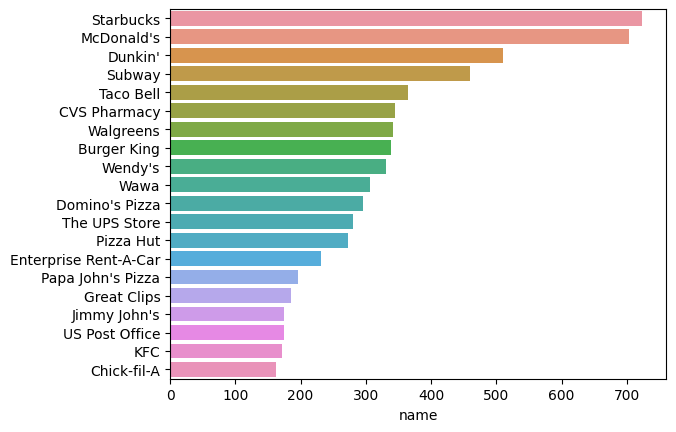

In [45]:
# top 20 common restaurants:
cnt = businesses['name'].value_counts()[:20].to_frame()
sns.barplot(x = cnt['name'], y = cnt.index)

<Axes: xlabel='categories'>

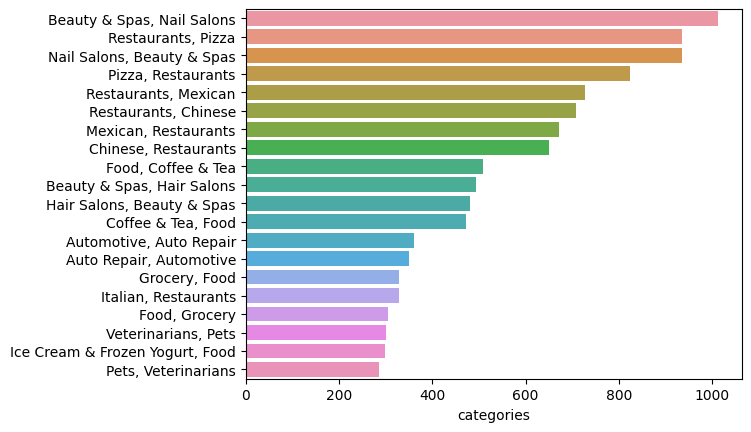

In [49]:
#top 20 common categories
cnt = businesses['categories'].value_counts()[:20].to_frame()
sns.barplot(x = cnt['categories'], y = cnt.index)

In [50]:
#find only restaurant categories -- may need to check if other keywords besides 'Restaurants'
def restaurant(row):
    if row['categories']:
        if 'Restaurants' in row['categories']:
            return 1
        else:
            return 0
    return 0

businesses['is_restaurant'] = businesses.apply(restaurant, axis = 1)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_restaurant
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",0


In [51]:
open_restaurants = businesses[(businesses['is_restaurant'] == 1) & (businesses['is_open'] == 1)]

In [52]:
basic_details(open_restaurants)

Row:34987, columns:15


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
postal_code,0,object
latitude,0,float64
longitude,0,float64
stars,0,float64
review_count,0,int64


In [61]:
open_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,is_restaurant
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",1
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",1


In [62]:
open_restaurants['attributes']

3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
5         {'BusinessParking': 'None', 'BusinessAcceptsCr...
9         {'RestaurantsAttire': ''casual'', 'Restaurants...
11        {'Alcohol': ''none'', 'OutdoorSeating': 'None'...
12        {'RestaurantsReservations': 'False', 'Restaura...
                                ...                        
150323    {'BikeParking': 'True', 'Alcohol': 'u'full_bar...
150325    {'BikeParking': 'True', 'BusinessAcceptsCredit...
150327    {'WiFi': ''free'', 'RestaurantsGoodForGroups':...
150336    {'WheelchairAccessible': 'False', 'Restaurants...
150339    {'RestaurantsDelivery': 'False', 'BusinessAcce...
Name: attributes, Length: 34987, dtype: object

<Axes: xlabel='categories'>

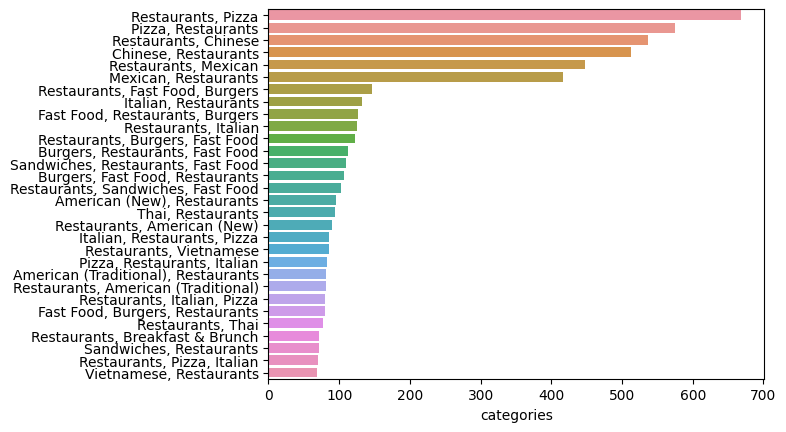

In [55]:
#top 20 common categories
cnt = open_restaurants['categories'].value_counts()[:30].to_frame()
sns.barplot(x = cnt['categories'], y = cnt.index)

In [102]:
unique_set = set([word.strip() for word in ','.join(open_restaurants['categories'].to_list()).split(',')])
unique_cats = list(unique_set)

In [ ]:
###### valid_cats = []

In [98]:
# start = 'Sports Clubs'\
start = unique_cats[0]
for cat in unique_cats[unique_cats.index(start):]: 
    valid = input(cat+ " is rest cat: ")
    if valid in ["y", "yes", "Y", "Yes", "t" ,"true", 'T', 'True']:
        valid_cats.append(cat)
    elif valid == "STOP": 
        print("\nSTOPPED at: "+ cat)
        break

Sports Clubs is rest cat:  y
Business Consulting is rest cat:  
Damage Restoration is rest cat:  
Wine & Spirits is rest cat:  y
French is rest cat:  y
Dentists is rest cat:  
Appliances is rest cat:  
Tapas Bars is rest cat:  y
Czech is rest cat:  y
Medical Spas is rest cat:  
Beauty & Spas is rest cat:  
Lawn Services is rest cat:  
Pets is rest cat:  
Bus Tours is rest cat:  
Visitor Centers is rest cat:  
Hardware Stores is rest cat:  
Stadiums & Arenas is rest cat:  
Screen Printing/T-Shirt Printing is rest cat:  
Dance Schools is rest cat:  
Pool & Billiards is rest cat:  y
Distilleries is rest cat:  y
Mattresses is rest cat:  
Vacation Rentals is rest cat:  
Wedding Chapels is rest cat:  
Tabletop Games is rest cat:  
Customized Merchandise is rest cat:  
Southern is rest cat:  y
Organic Stores is rest cat:  y
Adult Entertainment is rest cat:  
Pediatricians is rest cat:  
Strip Clubs is rest cat:  
Airlines is rest cat:  
Supernatural Readings is rest cat:  
Chiropractors is re

In [100]:
valid_set = set(valid_cats)
invalid_set = unique_set.difference(valid_set)

In [110]:
for item in sorted(valid_cats):
    print(item)

Acai Bowls
Adult
Afghan
African
American (New)
American (Traditional)
Arabic
Arcades
Argentine
Armenian
Asian Fusion
Australian
Austrian
Bagels
Bakeries
Bangladeshi
Bar Crawl
Barbeque
Bars
Bartenders
Basque
Bed & Breakfast
Beer
Beer Bar
Beer Gardens
Belgian
Beverage Store
Bistros
Brasseries
Brazilian
Breakfast & Brunch
Breweries
Brewpubs
British
Bubble Tea
Buddhist Temples
Buffets
Burgers
Burmese
Butcher
CSA
Cafes
Cafeteria
Cajun/Creole
Calabrian
Cambodian
Canadian (New)
Candy Stores
Cantonese
Caribbean
Caterers
Champagne Bars
Cheese Shops
Cheesesteaks
Chicken Shop
Chicken Wings
Chinese
Chocolatiers & Shops
Cideries
Cocktail Bars
Coffee & Tea
Coffee & Tea Supplies
Coffee Roasteries
Coffeeshops
Colombian
Comfort Food
Conveyor Belt Sushi
Cooking Classes
Creperies
Cuban
Cucina campana
Cultural Center
Cupcakes
Custom Cakes
Czech
Delicatessen
Delis
Desserts
Dim Sum
Diners
Dinner Theater
Distilleries
Dive Bars
Do-It-Yourself Food
Dominican
Donairs
Donburi
Donuts
Drive-Thru Bars
Dumplings
Eas

In [111]:
for item in sorted(invalid_set):
    print(item)

Accessories
Accountants
Active Life
Adult Education
Adult Entertainment
Advertising
Air Duct Cleaning
Airlines
Airport Lounges
Airport Shuttles
Airport Terminals
Airports
Amateur Sports Teams
Amusement Parks
Animal Shelters
Antiques
Apartments
Appliances
Appliances & Repair
Aquariums
Art Classes
Art Galleries
Art Museums
Art Tours
Arts & Crafts
Arts & Entertainment
Auction Houses
Audio/Visual Equipment Rental
Auto Customization
Auto Detailing
Auto Glass Services
Auto Loan Providers
Auto Parts & Supplies
Auto Repair
Automotive
Axe Throwing
Banks & Credit Unions
Barbers
Battery Stores
Batting Cages
Beaches
Beauty & Spas
Beer Tours
Bike Rentals
Bike Repair/Maintenance
Bikes
Billing Services
Boat Charters
Boat Repair
Boat Tours
Boating
Bocce Ball
Body Shops
Books
Bookstores
Botanical Gardens
Bowling
Brewing Supplies
Bridal
Building Supplies
Bus Tours
Business Consulting
Business Law
Cabaret
Candle Stores
Cannabis Clinics
Cannabis Dispensaries
Car Dealers
Car Share Services
Car Stereo Insta

## RUN THESE IF YOU HAVEN'T RUN THE INITIAL PERUSAL CELLS

In [4]:
def restaurant(row):
    if row['categories']:
        if 'Restaurants' in row['categories']:
            return 1
    return 0

businesses['is_restaurant'] = businesses.apply(restaurant, axis = 1)
open_restaurants = businesses[(businesses['is_restaurant'] == 1) & (businesses['is_open'] == 1)]

In [5]:
with open("valid_cats.txt", "r") as f:
    valid_cats = f.read()
    valid_cats = valid_cats.split("\n")

## Explode Categories

In [6]:
new_cols = [open_restaurants]
for cat in valid_cats:
    new_cols.append((1*open_restaurants['categories'].str.contains(cat, regex = False)).rename(cat))
open_restaurants_exploded = pd.concat(new_cols, axis = 1)
open_restaurants_exploded.drop(['categories'], axis = 1, inplace = True)

# Remove rows that dont have any of the valid tags? 
print(f"Num rows before: {open_restaurants_exploded.shape[0]}")
open_restaurants_clean = open_restaurants_exploded[open_restaurants_exploded[valid_cats].sum(axis=1) != 0]
print(f"Num rows cleaned: {open_restaurants_clean.shape[0]}")

Num rows before: 34987
Num rows cleaned: 34853


## Look at exploded data

In [280]:
basic_details(open_restaurants_clean)

Row:34853, columns:327


,Number of missing value,Data type
business_id,0,object
name,0,object
address,0,object
city,0,object
state,0,object
...,...,...
Wine Tasting Classes,0,int64
Wine Tasting Room,0,int64
Wine Tours,0,int64
Wineries,0,int64


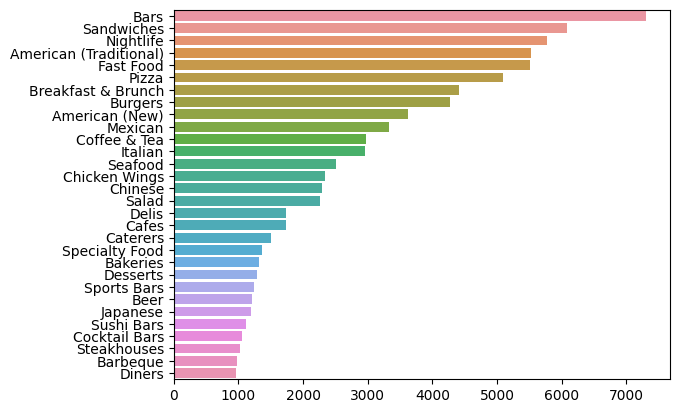

In [359]:
cnt = open_restaurants_clean[valid_cats].sum(numeric_only=None).sort_values(ascending = False)[:30]
sns.barplot(x = cnt.values, y = cnt.index)

## Condense our categories

In [7]:
# Remove rows that dont have any of the valid categories and only keep top 30 categories
print(f"Shape  before: {open_restaurants_clean.shape}")
cnt = open_restaurants_clean[valid_cats].sum(numeric_only=None).sort_values(ascending = False)[:30]
drop_cats = set(valid_cats).difference(cnt.index)
open_restaurants_condensed = open_restaurants_clean[open_restaurants_clean[cnt.index].sum(axis=1) != 0].drop(drop_cats, axis = 1)
print(f"Shape condensed: {open_restaurants_condensed.shape}")

Shape  before: (34853, 289)
Shape condensed: (32380, 44)


## look at condensed

In [442]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(basic_details(open_restaurants_condensed))

Row:32380, columns:82
                            Number of missing value Data type
business_id                                       0    object
name                                              0    object
address                                           0    object
city                                              0    object
state                                             0    object
postal_code                                       0    object
latitude                                          0   float64
longitude                                         0   float64
stars                                             0   float64
review_count                                      0     int64
is_open                                           0     int64
hours                                          2971    object
is_restaurant                                     0     int64
RestaurantsDelivery                           25402    object
OutdoorSeating                                26

## Explode Attributes

In [8]:
open_restaurants_condensed = open_restaurants_condensed.join(pd.json_normalize(open_restaurants_condensed['attributes']))
open_restaurants_condensed.drop(['DietaryRestrictions','HairSpecializesIn'], inplace = True, axis = 1)

In [9]:
for col in ['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsTakeOut', 'ByAppointmentOnly',
            'Caters', 'RestaurantsReservations','GoodForKids' ,'CoatCheck', 'DogsAllowed','RestaurantsTableService','RestaurantsGoodForGroups',
            'WheelchairAccessible','HasTV','HappyHour','DriveThru', 'BusinessAcceptsBitcoin', 'GoodForDancing', 'BYOB','Corkage',
            'RestaurantsCounterService','Open24Hours','AcceptsInsurance']:
    open_restaurants_condensed[col].replace({'True': 1, 'False': -1, 'None' : 0, np.nan:0}, inplace = True)

In [10]:
## ASSUMPTIONS MADE HERE... sometimes none/nan should not be interpreted as 0, but here we assume so... 

attribute_conversions = {
    'RestaurantsPriceRange2': {'2':2, '1':1, '3':3, '4':4, 'None':np.nan},
    'WiFi': {np.nan:0, "'free'":1, "u'free'":1, "u'no'":0, "u'paid'":-1, "'no'":0, "'paid'":-1, 'None':0},
    'Alcohol': {"'none'":0, "'full_bar'":2, np.nan:0, "u'full_bar'":2, "u'none'":0, "'beer_and_wine'":1, "u'beer_and_wine'":1, 'None':0},
    'RestaurantsAttire': {np.nan:0, "'casual'":1, "u'casual'":1, "u'dressy'":2, "'dressy'":2, "u'formal'":3, 'None':0, "'formal'":3},
    'NoiseLevel': {np.nan:0, "u'average'":0, "u'quiet'":-1, "u'very_loud'":2, "'average'":0, "u'loud'":1, "'quiet'":-1, "'loud'":1, 'None':0, "'very_loud'":2,},
    'Smoking': {np.nan:0, "u'outdoor'":1, "u'no'":2, "u'yes'":-1, "'no'":2},
    'BYOBCorkage':{np.nan:0, "'no'":-1, "'yes_free'":2, 'None':0, "'yes_corkage'":1, "u'no'":-1, "u'yes_free'":2, "u'yes_corkage'":1},
    'AgesAllowed':{np.nan:0, "u'allages'":1, "u'21plus'":2}
}

for col, mapping in attribute_conversions.items():
    open_restaurants_condensed[col].replace(mapping, inplace = True)

In [11]:
for col in ['BusinessParking', 'Ambience', 'GoodForMeal', 'Music', 'BestNights']:
    open_restaurants_condensed[col] = open_restaurants_condensed[col].apply(lambda x: eval(x) if isinstance(x, str) else x)
    df = pd.json_normalize(open_restaurants_condensed[col])
    df.columns = [col+'.'+column for column in df.columns]
    open_restaurants_condensed.drop(col, inplace = True, axis = 1)
    open_restaurants_condensed = open_restaurants_condensed.join(df)
    

## Look at exploded attributes

In [23]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(basic_details(open_restaurants_condensed))

Row:32380, columns:110
                            Number of missing value Data type
business_id                                       0    object
name                                              0    object
address                                           0    object
city                                              0    object
state                                             0    object
postal_code                                       0    object
latitude                                          0   float64
longitude                                         0   float64
stars                                             0   float64
review_count                                      0     int64
is_open                                           0     int64
attributes                                      359    object
hours                                          2971    object
is_restaurant                                     0     int64
American (New)                                 

## Save the ds

In [24]:
open_restaurants_condensed.to_csv('business_data.csv',index=False)

## OPEN QUESTIONS

In [ ]:
### Questions about data 
## Remove restaurants with less reviews? or just remove review_coubnt as column??
## Remove sparse attributes?
## Sparse categories were removed, but should we find another way to consolidate?
## data is fairly high dimensional...

In [449]:
sum(open_restaurants_condensed['review_count'] > 100)

8583

In [26]:
reviewd_rests = open_restaurants_condensed[open_restaurants_condensed['review_count'] > 100]

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(open_restaurants[['city','state']].value_counts())

city                                                  state
Philadelphia                                          PA       3525
Tampa                                                 FL       1964
Indianapolis                                          IN       1904
Nashville                                             TN       1681
Tucson                                                AZ       1639
Edmonton                                              AB       1553
New Orleans                                           LA       1391
Saint Louis                                           MO        957
Reno                                                  NV        796
Boise                                                 ID        601
Santa Barbara                                         CA        446
Wilmington                                            DE        437
Clearwater                                            FL        436
St. Louis                                             MO